# ART RECOMMENDER SYSTEM

## Analysing Data - Prado

This script will take the data retrieved from step [Importing and Cleaning Data - Prado](02_Prado_LoadClean.ipynb) and perform several analysis: TFIDF Analysis, StopWord removal, Topic Analysis and Topic graph.  

The best fitting topic model will be saved to use in further steps to try and match the resulting topics with the topics found in the [Data Analysis for MET](03_MET_AnalysisTFIDF.ipynb)

In [1]:
import pickle
import nltk
import pandas as pd
import numpy as np

from sklearn import decomposition
from sklearn import feature_extraction
from textblob import TextBlob
from os import listdir
from os.path import isfile, join
from sklearn.feature_extraction.text import TfidfVectorizer


**Load all the descriptions retrieved from the scrapping of the website**

In [2]:
mypath = '../PradoFiles/'
onlyfiles = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])
onlyfiles

['Prado_descriptions_9119.pkl',
 'Prado_descriptions_9400.pkl',
 'Prado_descriptions_9990.pkl']

In [3]:
prado_df = []
for p in onlyfiles :
    with open(mypath + p, 'rb') as f:
        prado_df = prado_df + pickle.load(f)
len(prado_df)

9990

In [4]:
prado_df[:10]

[('El Pantocrátor sostenido por cuatro ángeles. Pintura mural de la ermita de la Vera Cruz de Maderuelo',
  'https://www.museodelprado.es/coleccion/obra-de-arte/el-pantocrator-sostenido-por-cuatro-angeles/a331fb54-a6d4-4732-8509-daf462aa92bb?searchid=935001db-1031-b6de-3326-c18d0bc88037',
  'El conjunto de las pinturas murales de la ermita de la Vera Cruz de Maderuelo (Segovia) fue trasladado a lienzo en 1947 y reconstruido en el Museo del Prado lo más fielmente posible a su disposición original. Los muros de la capilla están decorados con figuras de ángeles, Apóstoles y escenas evangélicas, y los testeros presentan dos temas bíblicos: Bóveda, centro: El Pantocrátor sostenido por cuatro ángeles; lateral izquierdo: La Anunciación, Ángel turiferario, San Mateo y San Lucas. Lateral derecho: San Marcos, Ángel con rollo, ¿San Juan Evangelista?, Ángel turiferario, Ángel con libro, Santo obispo. Medios puntos: Caín (para algunos autores Melquisedec) y Abel presentan ofrendas al Cordero insert

In [4]:
#Aqui tengo solo los textos
prado_desc = [x[2] for x in prado_df if x[1] != '']
len(prado_desc)

9990

In [5]:
#Eliminar duplicados
prado_desc = list(set(prado_desc))
len(prado_desc)

6965

# TFIDF Analysis
### Stemming (Test for spanish stemmers)

In [7]:
from nltk.stem import SnowballStemmer

def norm_text(text) :
    word_list = []
    stemmer = SnowballStemmer('spanish')
    wrds = words.split()
    for word in wrds:
         word_list.append(stemmer.stem(word))
    return ' '.join(word_list)

In [103]:
w = 28
print(prado_desc[w])
print(norm_text(prado_desc[w]))

This mourning handkerchief commemorates President McKinley's assassination at the Pan-American Exposition in Buffalo, New York 1901. The 1899 date printed on the handkerchief reflects the copyright for the cyanotype process, but the date of the handkerchief itself is 1901 or after. The flags in the boarder signify the participating nations in the Pan-American Exposition.
thi mourn handkerchief commem presid mckinley 's assassin at the pan-americ exposit in buffalo new york 1901 the 1899 dat print on the handkerchief reflect the copyright for the cyanotyp process but the dat of the handkerchief itself is 1901 or aft the flag in the board sign the particip nat in the pan-americ exposit


In [104]:
norm_desc=[norm_text(w) for w in prado_desc]
norm_desc[:5]

["feat her is an extraordin exampl of an inf 's gown that was certain for a baby of the highest soc ord the access record suggest that thi may hav been worn by a baby of a russ czar which would be appropry as the dress is quit grandios the high soc stand of the individ is ind by the extraordin leng of the skirt 33 3/4 inch with the typ longest leng of inf 's dress being 28 30 inch thi piec is mor refin than oth exampl due to the complex and exquisit needlework throughout",
 "the subject was the art 's fath 1768-1839",
 'the claw-and-ball feet flut column and urn-and-flame fin on thi coal grat exhibit clos simil to chippendale-styl furnit indee thoma chippend illust design for coal grat in his gentlem and cabinetmak ’ s direct not i would recommend the orna part to be of wrought brass and as they may be mad to tak off wil be easy cle',
 'the chromolithographed card has been apply to a larg piec of openwork lac pap and affix to a fold pag which op lik a book with poetry print on the vers

**Stop Words**  
(Stop words in spanish were downloaded from [here](https://github.com/stopwords-iso))

In [6]:
with open('../utils/stopwords-es.txt') as f:
    stop_words_es = f.readlines()
stop_words_es = [sw.replace('\n', '') for sw in stop_words_es]
stop_words_es += 'a b c d e f g h i j k l m n ñ o p q r s t u v w x y z'.split()
stop_words_es += 'i ii iii iv v vi vii viii ix x xi xii xiii xiv xv xvi xvii xviii xix xx pp'.split()
stop_words_es += 'museo museos museum prado obra obras pintura pinturas artista artistas dibujo dibujos lienzo lienzos mena \
                autor autores autora autoras ambas ambos torno disposicion nombre nombres boceto bocetos \
                pintor pintores siglo siglos periodo periodos decada decadas presente pasado futuro antiguo antigua habitual \
                retrato retratos arquitectura proyecto proyectos admirado arte artes elemento elementos vista vistas \
                motivo motivos principal principales menor mayor menores mayores interior exterior interiores exteriores \
                donado donada donados donadas donacion maestro maestros academia personaje personajes \
                izquierda izquierdo derecha derecho fondo coleccion colecciones madrid nacional plano traves \
                inferior superior inferiores superiores central mitad similar similares idea ideas posterior anterior \
                utilizar utilizo utiliza utilizando utilizaba utilizaban aspecto aspectos cuaderno cuadernos \
                tecnica tecnicas escena escenas ano anos año años catalogo exposicion produccion escuela caso casos algun algunos \
                diferencia diferencias icono iconografia posible diez frente conocido conocida conocidos conocidas \
                composicion composiciones expresion caracteristico caracteristica caracteristicas formato formatos angulo angulos \
                especial especialmente segura seguro seguramente posible posiblemente probable probablemente \
                tipo asunto asuntos particular particulares espacio espacios \
                desarrollo desarrolla desarrollando desarrollan desarrollar desarrollaba desarrollaban \
                plasmar plasma plasmo plasmando plasman tema temas conjunto conjuntos copia copias numeroso lapiz lapices \
                mostrar muestra muestro mostrando mostro muestran mostraba mostraban figura figuras apunte apuntes \
                encargo encargos tratamiento tratamientos serie series cuadro cuadros fresco frescos estudio estudios \
                aparecer aparecio aparece apareciendo aparecen aparecia aparecian \
                publicar publico publica publicando publican publicaba publicaban publicado publicada publicados publicadas \
                encontrar encuentro encuentra encontro encuentra encontrando encuentran encontraba encontraban \
                imagen imagenes cuyo cuya cuyos cuyas taller don dona estilo estilos inventario inventarios \
                mucho muchos mucha muchas arriba abajo centro diseno disenos temprano titulo titulo efecto efectos \
                color colores modelo modelos evidente relacion actitud fecha base ocasion ocasiones pictorico pictorica \
                contener contenido contenida contenidos contenidas contenia contiene contienen contenian \
                expresar expreso expresa expresaba expresaban expresando posicion posiciones texto textos \
                preparatorio preparatorios principio principios perfil perfiles importante importantes \
                grande gran pequeno grandes pequenos pequena pequenas alto bajo \
                espanol espanoles espanola espanolas italiano italiana italianos italianas \
                conservar conserva conservo conservan conservando conserbaba conservaban \
                realizar realiza realizo realizan realizando realizaba realizaban realizado realizada realizados realizadas \
                dar da doy dio dan dando daba daban das \
                representar representa represento representan representando representaba representaban representacion representado representada representado representadas \
                presentar presenta presento presentan presentando presentaba presentaban presentacion presentado presentados presentada presentadas \
                pintar pinta pinto pintan pintado pintada pintados pintadas pintando pintaba pintaban \
                terminar termina termino terminan terminado terminada terminados terminadas terminando terminaba terminaban \
                sostener sostiene sustuvo sostienen sostenido sostenida sostenidos sostenidas sosteniendo sostenia sostenian \
                permitir permite permitio permiten permitido permitida permitidos permitidas permitiendo permitia permitian \
                extraer extrae extrajo extractado extractada extraen extraido extraida extraidos extraidas extrayendo extraia extraian \
                recordar recuerda recordo recordado recordada recordados recordadas recuerdan recordando recordaba recordaban \
                atribuir atribuye atribuyo atribuido atribuida atribuidos atribuidas atribuyen atribuyendo atribuia atribuian \
                destacar destaca destaco destacado destacada destacados destacadas destacan destacando destacaba destacaban \
                apreciar aprecia aprecio apreciado apreciada apreciados apreciadas aprecian apreciando apreciaba apreciaban \
                recibir recibe recibo recibio recibido recibida recibidos recibidas reciben recibiendo recibia recibian \
                situar situa situo situado situada situados situadas situan situando situaba situaban \
                tener tiene tengo tenia tenian teniendo'.split()
stop_words_es = set(stop_words_es)    

### TFIDF Model

In [7]:
idf_vectorizer = feature_extraction.text.TfidfVectorizer(
    ngram_range=(1, 1),
    stop_words=stop_words_es,
    strip_accents = 'ascii',
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df = 0.03,
    max_df = 0.7
)

idf_vectorizer.fit(prado_desc)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=0.03,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'vaya', 'cuaderno', 'éste', 'mostraba', 'exposicion', 'xi', 'ningunas', 'utilizando', 'mostrar', 'b', 'tendrían', 'pintura', 'relacion', 'presentan', 'vuestra', 'utilizo', 'se', 'sostiene', 'haciendo', 'través', 'dibujo', 'permitidos', 'recibian', 'manifestó', 'extrae', 'expresar', 'tuvi...tro', 'das', 'primera', 'asuntos', 'aparece', 'cuánta', 'plasmo', 'contenidas', 'pueda', 'hubieron'},
        strip_accents='ascii', sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [8]:
feature_names = idf_vectorizer.get_feature_names()
print(f"""
number of features: {len(feature_names):,}
random set of features: {np.random.choice(feature_names, size=20)}
""")


number of features: 188
random set of features: ['formas' 'sentada' 'carrera' 'rostro' 'pensar' 'familia' 'jose' 'capilla'
 'blanco' 'italia' 'espectador' 'colorido' 'amplio' 'estancia' 'manos'
 'oro' 'carrera' 'felipe' 'gusto' 'resto']



In [9]:
# Create the term-document matrix
counts = idf_vectorizer.transform(prado_desc)
# this gives us a [num_documents, num_features] sparse matrix
counts.shape

(6965, 188)

## Topic Analysis - NMF
**How many topics?**  
Check inertia value from K-means models using diffferent k values.  KMeans is not the best model in this case, but it will give us an idea for k (Number of topics) when inertia is the lowest

In [170]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = range(3,21)
y_inertia = []

for k in x:
    km = KMeans(n_clusters=k, init='k-means++', n_init=5, random_state=1, n_jobs=1, max_iter=3)
    km.fit(counts)
    labels = km.labels_
    y_inertia.append(km.inertia_)
    print(k)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Populating the interactive namespace from numpy and matplotlib


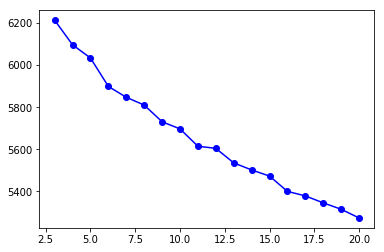

In [172]:
%pylab inline
plt.plot(x, y_inertia, 'bo-', )

In [11]:
n_topics = 7

### My Topics

In [12]:
from sklearn.decomposition import NMF

model = NMF(n_components=n_topics, init='random', random_state=818)
doc_top = model.fit_transform(counts)

In [13]:
doc_max_top = np.argmax(doc_top, axis=1 )
topic_words = []
for r in model.components_:
    r_normalized = r/sum(r)
    a = sorted([(v,i) for i,v in enumerate(r_normalized)],reverse=True)[0:10]
    topic_words.append([ f"{feature_names[e[1]]}, {e[0]:.2%}"  for e in a])
pd.DataFrame(np.array(topic_words).T)

,0,1,2,3,4,5,6
0,"san, 13.76%","marques, 21.53%","carlos, 19.31%","arnaez, 17.01%","goya, 24.74%","sanchez, 15.63%","rey, 2.64%"
1,"virgen, 4.61%","atribucion, 5.86%","gutierrez, 18.77%","cabeza, 13.36%","castillo, 6.84%","perez, 15.09%","felipe, 2.49%"
2,"santo, 4.51%","mano, 5.50%","cielo, 14.18%","zaragoza, 5.53%","jose, 6.54%","alfonso, 9.49%","palacio, 2.34%"
3,"iglesia, 3.80%","calidad, 3.16%","paisaje, 8.64%","toledo, 5.22%","mariano, 6.48%","mano, 3.22%","espana, 2.20%"
4,"juan, 3.79%","sentada, 2.96%","arboles, 6.85%","catedral, 4.99%","salvador, 6.46%","pie, 2.93%","real, 2.19%"
5,"santa, 3.68%","nino, 2.95%","nubes, 5.97%","palacio, 4.16%","pluma, 1.77%","desnudo, 2.68%","rubens, 2.05%"
6,"cristo, 3.15%","virgen, 2.56%","luz, 2.68%","femenina, 3.99%","francisco, 1.60%","manos, 2.13%","maria, 1.89%"
7,"francisco, 2.89%","reverso, 2.40%","paso, 1.76%","manos, 3.48%","negro, 1.36%","angeles, 2.01%","reina, 1.58%"
8,"nino, 2.65%","sentado, 2.26%","paisajes, 1.72%","real, 3.48%","mujer, 1.10%","cabeza, 1.99%","orden, 1.55%"
9,"retablo, 2.62%","pluma, 1.92%","natural, 1.34%","brazo, 3.39%","forma, 1.10%","sentado, 1.98%","historia, 1.54%"


In [142]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: (" % topic_idx
        message += "), (".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message+')')
    print()

In [143]:
print_top_words(model, feature_names, 10)

Topic #0: (san), (virgen), (santo), (iglesia), (juan), (santa), (cristo), (francisco), (nino), (retablo)
Topic #1: (marques), (atribucion), (mano), (calidad), (sentada), (nino), (virgen), (reverso), (sentado), (pluma)
Topic #2: (carlos), (gutierrez), (cielo), (paisaje), (arboles), (nubes), (luz), (paso), (paisajes), (natural)
Topic #3: (arnaez), (cabeza), (zaragoza), (toledo), (catedral), (palacio), (femenina), (manos), (real), (brazo)
Topic #4: (goya), (castillo), (jose), (mariano), (salvador), (pluma), (francisco), (negro), (mujer), (forma)
Topic #5: (sanchez), (perez), (alfonso), (mano), (pie), (desnudo), (manos), (angeles), (cabeza), (sentado)
Topic #6: (rey), (felipe), (palacio), (espana), (real), (rubens), (maria), (reina), (orden), (historia)



In [147]:
import pickle

model.feature_names = feature_names
with open('../models/Prado_NMF07.pkl', 'wb') as f:
    pickle.dump(model, f)

## Plot! (Dimention reduction to 2 (2D))

Populating the interactive namespace from numpy and matplotlib
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 995 samples in 0.000s...
[t-SNE] Computed neighbors for 995 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 995 / 995
[t-SNE] Mean sigma: 0.065098


/Users/monita/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.121468
[t-SNE] Error after 1000 iterations: 0.532977


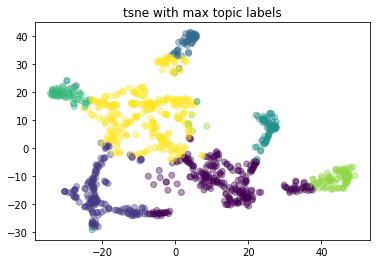

In [150]:
%pylab inline
from sklearn.manifold import TSNE
# plot with tsne!
doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(doc_top[::n_topics,:])

plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top[::n_topics], alpha=.4)
plt.title("tsne with max topic labels")
plt.savefig("../img/Prado_NMF07.pdf")

In [35]:
from sklearn.manifold import TSNE
new_values = TSNE(verbose=1, metric="cosine", perplexity=10).fit_transform(doc_top[::n_topics,:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 995 samples in 0.000s...
[t-SNE] Computed neighbors for 995 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 995 / 995
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.135437
[t-SNE] Error after 1000 iterations: 0.633776


Populating the interactive namespace from numpy and matplotlib


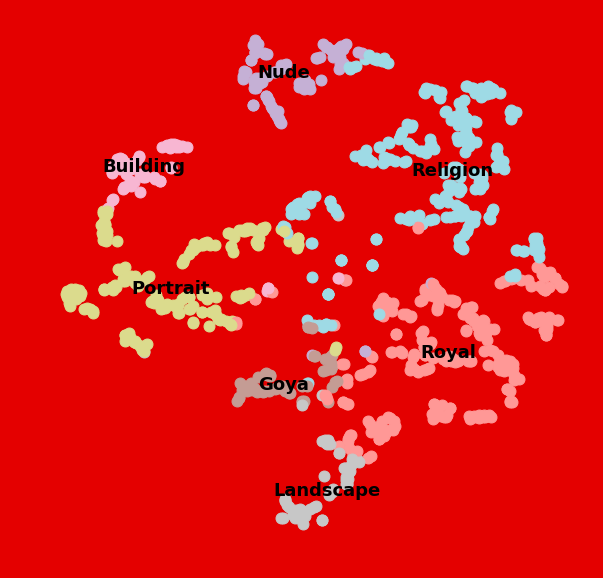

In [53]:
%pylab inline
import matplotlib.patches as mpatches
# plot with tsne!

x = []
y = []
labels = []
topics=['Religion', 'Portrait', 'Landscape', 'Building', 'Goya', 'Nude', 'Royal']
tokens=doc_top[::n_topics,:]
for value in new_values:
    x.append(value[0])
    y.append(value[1])

cmap = matplotlib.cm.get_cmap('tab20_r')
cmapScale = int(cmap.N / n_topics)
plt.figure(figsize=(10, 10),facecolor='#e40000ff')
labels = [] 
for i in range(len(x)):
    label = np.argmax(tokens[i])
    labels.append(label)
    plt.scatter(x[i],y[i], c=cmap(label*cmapScale),s=120)

color_legend = []
for i in range(n_topics):
    boolArr = np.array(labels) == i
    x_avg = np.median(np.array(x)[boolArr])
    y_avg = np.median(np.array(y)[boolArr])
    plt.annotate(topics[i],
                 xy=(x_avg, y_avg),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 fontsize=18, weight='bold')
                 #bbox=dict(boxstyle="round", fc="whitesmoke",alpha=0.7))
    color_legend.append(mpatches.Patch(color=cmap(i*cmapScale), label=f'Topic #{i+1}: {topics[i]}'))
# plt.legend(handles=color_legend,fontsize=18)
plt.axis('off')
plt.show()
plt.savefig("../img/Prado_NMF07.pdf")